In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

In [2]:
#Generar el Grafico
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [8]:
df = pd.read_csv("C:\\Users\\sergi\\OneDrive\\Documentos\\SIR_personal\\Python_SDC_HP-i3\\Python_SDC_hpi3_git\\Python_SDC_gitHub\\Smarket.csv", usecols=range(1,10), index_col=0, parse_dates=True)

In [9]:
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [10]:
pd.value_counts(df.Direction)/len(df)*100

Up      51.84
Down    48.16
Name: Direction, dtype: float64

In [14]:
x_train=df[:"2004"][["Lag1","Lag2"]]
y_train=df[:"2004"][["Direction"]]
x_test=df["2005":][["Lag1","Lag2"]]
y_test=df["2005":][["Direction"]]

In [15]:
data_train = pd.concat([x_train,y_train],axis=1)

In [16]:
data_train.head()

,Lag1,Lag2,Direction
Year,,,
2001-01-01,0.381,-0.192,Up
2001-01-01,0.959,0.381,Up
2001-01-01,1.032,0.959,Down
2001-01-01,-0.623,1.032,Up
2001-01-01,0.614,-0.623,Up


In [17]:
data_test = pd.concat([x_test,y_test],axis=1)

In [18]:
data_test.head()

,Lag1,Lag2,Direction
Year,,,
2005-01-01,-0.134,0.008,Down
2005-01-01,-0.812,-0.134,Down
2005-01-01,-1.167,-0.812,Down
2005-01-01,-0.363,-1.167,Up
2005-01-01,0.351,-0.363,Down


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sergi\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

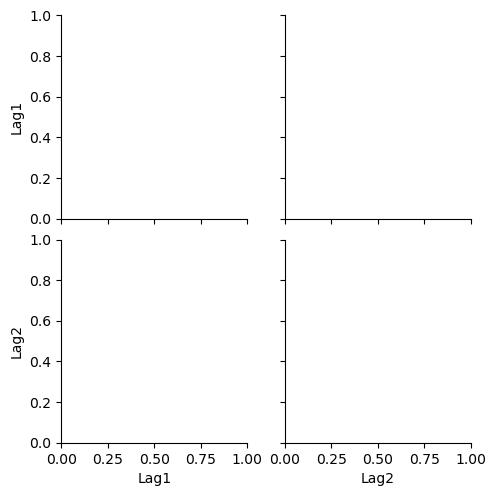

In [20]:
sns.pairplot(data_train,hue="Direction")
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [22]:
parametros = {
    "kernel":["linear","rbf","poly","sigmoid"],
    "gamma":[0.1,0.5,1],
    "C":[2.0,3.0,5.0]
}

In [23]:
svm_op = GridSearchCV(SVC(random_state=2022),
                     parametros,
                     scoring="roc_auc")

In [24]:
x_train_m=data_train.iloc[:,[0,1]].values
y_train_m=data_train.iloc[:,2].values

In [25]:
y_train_m =np.where(y_train_m=="Down",0,1)

In [26]:
svm_op.fit(x_train_m,y_train_m)

GridSearchCV(estimator=SVC(random_state=2022),
             param_grid={'C': [2.0, 3.0, 5.0], 'gamma': [0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [27]:
resultados= svm_op.cv_results_

In [28]:
resultados

{'mean_fit_time': array([ 0.04989066,  0.07412567,  0.06833992,  0.07318745,  0.04438434,
         0.05558186,  0.12701244,  0.04869113,  0.04416742,  0.06130972,
        26.52368956,  0.04838686,  0.04561472,  0.05465531,  0.05244036,
         0.05186057,  0.04184618,  0.05935354,  0.16818004,  0.05047197,
         0.04883599,  0.06538363, 24.13445158,  0.02734132,  0.04161935,
         0.05269265,  0.03705416,  0.04279137,  0.03629303,  0.03650308,
         0.85555973,  0.04375129,  0.05590496,  0.05927086, 22.22142577,
         0.03662534]),
 'std_fit_time': array([6.69907117e-03, 1.14536162e-02, 1.50352169e-02, 1.17808087e-02,
        2.96707982e-03, 2.09204112e-03, 2.25344966e-02, 1.40729617e-02,
        2.83708460e-03, 4.05241713e-03, 2.48278182e+01, 1.43113506e-02,
        6.51775854e-03, 5.60356507e-03, 5.84622385e-03, 6.21014812e-03,
        3.75178857e-03, 6.89316653e-03, 2.30853843e-02, 1.41125957e-02,
        3.96820932e-03, 8.65967192e-03, 2.30567772e+01, 6.15778174e-03,
 

In [29]:
for param, score_media, score_sd in zip(resultados["params"],resultados["mean_test_score"],resultados["std_test_score"]):
    print(param,round(score_media,2),round(score_sd,2))

{'C': 2.0, 'gamma': 0.1, 'kernel': 'linear'} 0.51 0.03
{'C': 2.0, 'gamma': 0.1, 'kernel': 'rbf'} 0.49 0.06
{'C': 2.0, 'gamma': 0.1, 'kernel': 'poly'} 0.49 0.03
{'C': 2.0, 'gamma': 0.1, 'kernel': 'sigmoid'} 0.46 0.01
{'C': 2.0, 'gamma': 0.5, 'kernel': 'linear'} 0.51 0.03
{'C': 2.0, 'gamma': 0.5, 'kernel': 'rbf'} 0.45 0.03
{'C': 2.0, 'gamma': 0.5, 'kernel': 'poly'} 0.47 0.05
{'C': 2.0, 'gamma': 0.5, 'kernel': 'sigmoid'} 0.5 0.05
{'C': 2.0, 'gamma': 1, 'kernel': 'linear'} 0.51 0.03
{'C': 2.0, 'gamma': 1, 'kernel': 'rbf'} 0.45 0.04
{'C': 2.0, 'gamma': 1, 'kernel': 'poly'} 0.48 0.04
{'C': 2.0, 'gamma': 1, 'kernel': 'sigmoid'} 0.53 0.05
{'C': 3.0, 'gamma': 0.1, 'kernel': 'linear'} 0.48 0.06
{'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'} 0.49 0.05
{'C': 3.0, 'gamma': 0.1, 'kernel': 'poly'} 0.47 0.05
{'C': 3.0, 'gamma': 0.1, 'kernel': 'sigmoid'} 0.47 0.03
{'C': 3.0, 'gamma': 0.5, 'kernel': 'linear'} 0.48 0.06
{'C': 3.0, 'gamma': 0.5, 'kernel': 'rbf'} 0.45 0.03
{'C': 3.0, 'gamma': 0.5, 'kernel': 'po

In [30]:
svm_model = SVC(C=2.0,gamma=1,kernel="sigmoid",random_state=2022)

In [31]:
svm_model.fit(x_train_m,y_train_m)

SVC(C=2.0, gamma=1, kernel='sigmoid', random_state=2022)

In [32]:
plot_decision_regions(x_train_m,y_train_m,svm_model)

C:\Users\sergi\AppData\Local\Temp\ipykernel_69800\3940256815.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


**Performance train**

In [28]:
y_predict_t = svm_model.predict(x_train_m)

In [31]:
import model_evaluation_utils as meu

In [32]:
label_names=[0,1]

In [33]:
meu.display_model_performance_metrics(y_train_m,
                                     y_predict_t,
                                     label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.5271
Precision: 0.5271
Recall: 0.5271
F1 Score: 0.5271

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       491
           1       0.53      0.53      0.53       507

    accuracy                           0.53       998
   macro avg       0.53      0.53      0.53       998
weighted avg       0.53      0.53      0.53       998


Prediction Confusion Matrix:
------------------------------
     0    1
0  255  236
1  236  271


**Performance test**

In [34]:
data_test.head()

,Lag1,Lag2,Direction
Year,,,
2005-01-01,-0.134,0.008,Down
2005-01-01,-0.812,-0.134,Down
2005-01-01,-1.167,-0.812,Down
2005-01-01,-0.363,-1.167,Up
2005-01-01,0.351,-0.363,Down


In [35]:
x_test_m=data_test.iloc[:,[0,1]].values
y_test_m=data_test.iloc[:,2].values

In [36]:
y_test_m = np.where(y_test_m=="Down",0,1)

In [37]:
y_predict_test=svm_model.predict(x_test_m)

In [38]:
meu.display_model_performance_metrics(y_test_m,
                                     y_predict_test,
                                     label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.5397
Precision: 0.5494
Recall: 0.5397
F1 Score: 0.5411

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.48      0.57      0.52       111
           1       0.60      0.52      0.56       141

    accuracy                           0.54       252
   macro avg       0.54      0.54      0.54       252
weighted avg       0.55      0.54      0.54       252


Prediction Confusion Matrix:
------------------------------
    0   1
0  63  48
1  68  73
